# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [27]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%reload_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

In [41]:
# Model

model = inauguralproject.HouseholdSpecializationModelClass()

# We start creating list with values of alpha and sigma

alpha = [0.25, 0.50, 0.75]
sigma = [0.5, 1.0, 1.5]

#Empty dataframe
df = pd.DataFrame(columns = pd.Index(alpha, name="alpha"), index = pd.Index(sigma, name = "sigma"))

for i in alpha:
    for j in sigma:
        model.par.alpha = i
        model.par.sigma = j
        results = model.solve_discrete()
        ratio = results.HF / results.HM
        df.loc[j,i] = f"{ratio:.2f}"   # used to update the value in the DataFrame at the row index "j" and column index "i" with a string representation of the "ratio" value rounded to two decimals.    
        
header = pd.MultiIndex.from_product([['alpha'], alpha])
df.columns = header
print(df.to_string())



      alpha            
       0.25  0.50  0.75
sigma                  
0.5    0.55  1.00  1.83
1.0    0.31  1.00  3.25
1.5    0.21  1.00  4.67


# Question 2

Explain your code and procedure

In [51]:
# Model

model_2 = inauguralproject.HouseholdSpecializationModelClass()

#Unpaking model parameters
par = model_2.par

list_wage = [0.8, 0.9, 1, 1.1, 1.2]
results_2 = []

#Code solves the discrete model for different relativ wages
for i in par.wF_vec:
    par.wF = i
    results = model_2.solve_discrete()
        
    relative_hours = results.HF/results.HM
    log_relative_h = np.log(relative_hours)
    results_2 = np.append(results_2, log_relative_h)



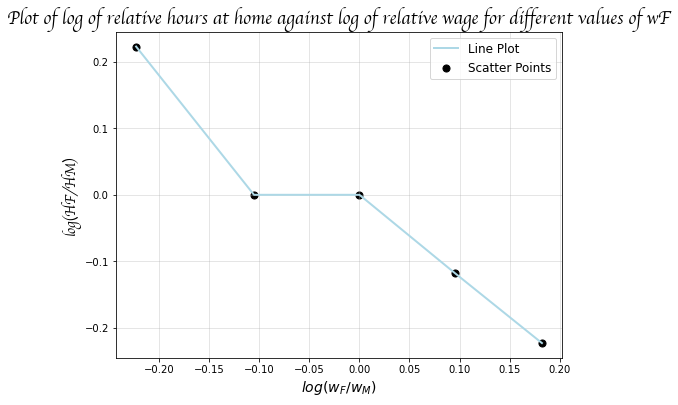

In [48]:
# create figure
fig = plt.figure(figsize=(8,6))

# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(par.wF_vec), results_2, color='lightblue', lw=2, label='Line Plot')
ax.scatter(np.log(par.wF_vec), results_2, s=50, color='black', label='Scatter Points')

# alterations to figure
ax.grid(alpha=0.4)
ax.set_xlabel("$log(w_F/w_M)$", fontfamily='cursive', fontsize=14)
ax.set_ylabel("log(HF/HM)", fontfamily='cursive', fontsize=14)
ax.set_title("Plot of log of relative hours at home against log of relative wage for different values of wF", fontfamily='cursive', fontsize=18)
ax.legend(fontsize=12)

plt.show()


# Question 3

In [58]:
model_3 = inauguralproject.HouseholdSpecializationModelClass()

par = model_3.par

results_3 = []

#Code solves the continuous model for different relativ wages
for i in par.wF_vec:
    par.wF = i
    opt = model_3.solve()
        
    relative_hours = opt.HF/opt.HM
    log_relative_h = np.log(relative_hours)
    results_3 = np.append(results_3, log_relative_h)



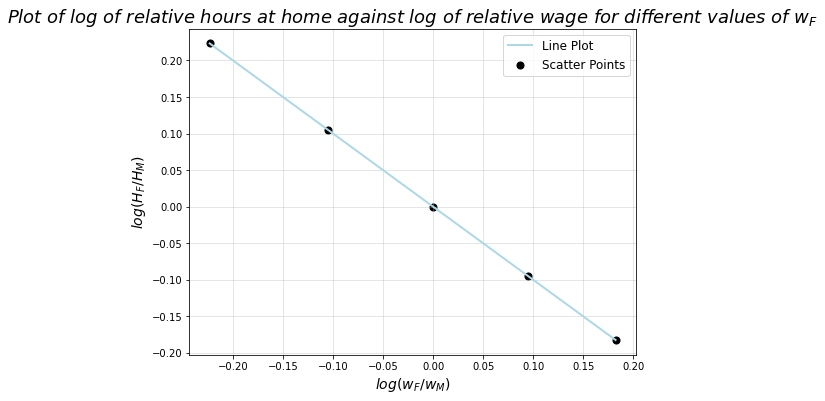

In [77]:
# create figure
fig = plt.figure(figsize=(8,6))

# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(par.wF_vec), results_3, color='lightblue', lw=2, label='Line Plot')
ax.scatter(np.log(par.wF_vec), results_3, s=50, color='black', label='Scatter Points')

# alterations to figure
ax.grid(alpha=0.4)
ax.set_xlabel("$log(w_F/w_M)$", fontstyle='italic', fontsize=14)
ax.set_ylabel("$log(H_F/H_M)$", fontstyle='italic', fontsize=14)
ax.set_title("Plot of log of relative hours at home against log of relative wage for different values of $w_F$", fontstyle='italic', fontsize=18)
ax.legend(fontsize=12)

plt.show()

# Question 4